![](模型的泛化能力.png)

过拟合情况下，对训练数据集的数据点拟合得很好，  
但面对新的数据时，泛化能力很差  
而我们需要的是对预测数据效果好

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [5]:
# 线性回归
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

2.2199965269396573

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolyReg(degree):
    return Pipeline([
        ("ploy",PolynomialFeatures(degree=degree)),
        ("std_scalar",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [9]:
# 多项式回归
poly2_reg = PolyReg(degree=2)
poly2_reg.fit(X_train,y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

0.80356410562979

In [11]:
# 多项式回归
poly10_reg = PolyReg(degree=10)
poly10_reg.fit(X_train,y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test,y10_predict)
# 均方误差变大，泛化能力变差

0.9212930722150768

In [12]:
# 多项式回归
poly100_reg = PolyReg(degree=100)
poly100_reg.fit(X_train,y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test,y100_predict)

14075796434.50641

# 测试数据集的意义
模型复杂度：  
- 对于kNN来说，k值越大，表明模型越简单，因为当k取n的时候，就是看数据中哪个样本数量最多。  
- 对于多项式回归来说，degree取值越大，模型复杂度越大
![](测试数据集的意义.png)

# 过拟合、欠拟合
- 欠拟合：不能很好地表达**数据**
- 过拟合：算法训练的模型过多地表达了数据间地噪音关系

![](模型复杂度曲线.png)

学习曲线——随着训练样本的逐渐增多，算法训练出的模型的表现能力
![](学习曲线.png)

# 学习曲线

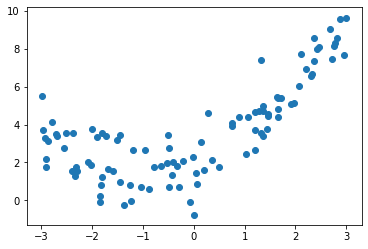

In [13]:
plt.scatter(x,y)
plt.show()

In [15]:

train_score = []
test_score = []

for i in range(1,76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i],y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i],y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test,y_test_predict))

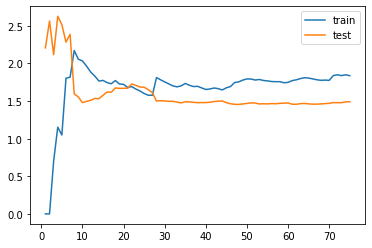

In [17]:
plt.plot([i for i in range(1,76)],np.sqrt(train_score),label="train")
plt.plot([i for i in range(1,76)],np.sqrt(test_score),label="test")
plt.legend()
plt.show()

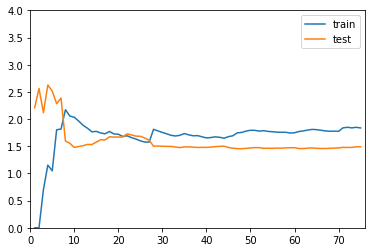

In [24]:
def plot_learning_curve(algo,X_train,X_test,y_train,y_test):
    
    train_score = []
    test_score = []

    for i in range(1,len(X_train)+1):
        algo.fit(X_train[:i],y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test,y_test_predict))
    
    plt.plot([i for i in range(1,len(X_train)+1)],np.sqrt(train_score),label="train")
    plt.plot([i for i in range(1,len(X_train)+1)],np.sqrt(test_score),label="test")
    plt.legend()
    plt.axis([0,len(X_train)+1,0,4])
    plt.show()


plot_learning_curve(LinearRegression(),X_train,X_test,y_train,y_test)

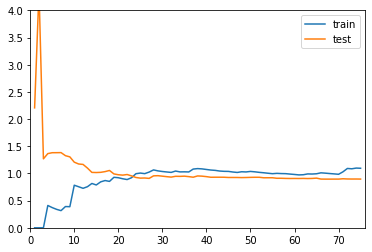

In [25]:
plot_learning_curve(poly2_reg,X_train,X_test,y_train,y_test)

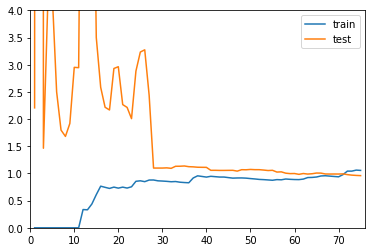

In [26]:
plot_learning_curve(poly10_reg,X_train,X_test,y_train,y_test)

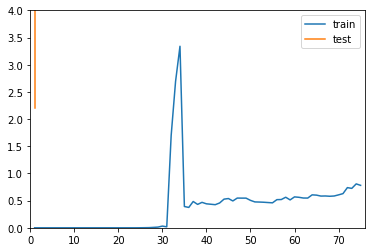

In [27]:
plot_learning_curve(poly100_reg,X_train,X_test,y_train,y_test)

在训练数据集上表现好，但是在测试数据上表现不好↑·
![](欠拟合-学习曲线.png)
![](过拟合-学习曲线.png)
